# SPDE for Spiral Anisotropy

<!-- SUMMARY: Estimation and Simulations performed with a non-stationary anisotropy of the covariance (spiral form), treated in the SPDE formalism -->

<!-- CATEGORY: SPDE -->

In this tutorial, we show how the use of SPDE for Varying Anisotropy when this Anisotropy must follow a Spiral shape (defined as an external function)

In [1]:
import gstlearn as gl
import gstlearn.plot as gp
import gstlearn.document as gdoc
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
import math

gdoc.setNoScroll()

<IPython.core.display.Javascript object>

Defining the Model as a single Matern structure. This function is defined as anisotropic: we clearly specify the extension of the ranges in the two main directions. The angle does not have to be defined here: it will be overwritten later as the non-stationary parameter.
Note that it is essential to define the short range of the anisotropy ellipsoid first (for the definition of angle as defined in the Spiral function used as a function)... otherwise future results will represent the shape otabined as the *orthogonal* of the spirale.

In [2]:
model = gl.Model.createFromParam(gl.ECov.MATERN, 1., 1., 1., [4.,45.])

A Spiral function is defined and attached to the Model: this is a manner to update the Model by transforming the anisotropy angle as the *unique* non-stationary parameter.

In [3]:
spirale = gl.FunctionalSpirale(0., -1.4, 1., 1., 50., 50.)
cova = model.getCova(0)
cova.makeAngleNoStatFunctional(spirale)
#nostat = gl.NoStatFunctionalCov(spirale)
#cova.addNoStat(nostat)
#model.display()

A visualisation of the non-stationarity can be otanined in the following paragraph. The angle is represented at each node of a grid. For better legibility the grid is defined as a coarse grid.

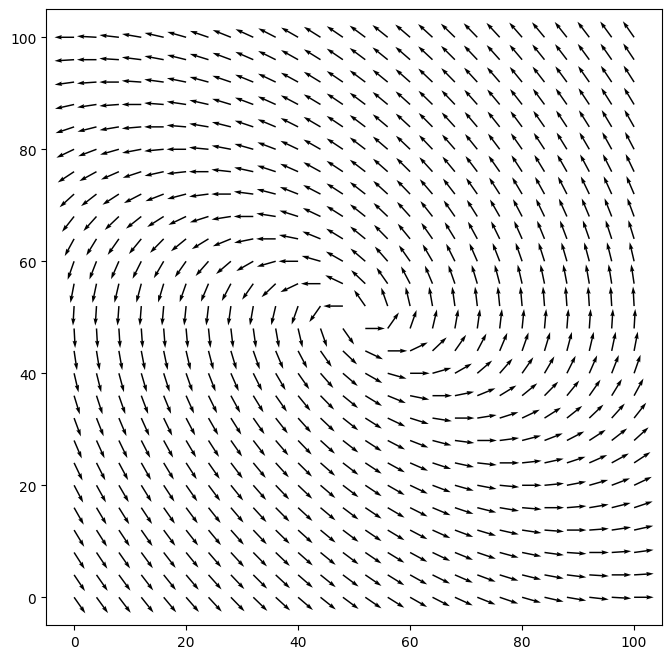

In [4]:
coarse = gl.DbGrid.create([26,26],[4.,4.])
ax = gp.covaOnGrid(cova, coarse, scale=2000)

Creating a output grid

In [5]:
grid = gl.DbGrid.create([101,101],[1.,1.]) 

Perform several non-conditional simulations on the grid, using the Model and the non-stationarity.

In [6]:
nbsimu = 4
iuid = gl.simulateSPDE(None,grid,model,nbsimu)
grid


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 7
Total number of samples      = 10201

Grid characteristics:
---------------------
Origin :      0.000     0.000
Mesh   :      1.000     1.000
Number :        101       101

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = SimuSPDE.1 - Locator = z1
Column = 4 - Name = SimuSPDE.2 - Locator = z2
Column = 5 - Name = SimuSPDE.3 - Locator = z3
Column = 6 - Name = SimuSPDE.4 - Locator = z4

We represent the non-conditional simulations

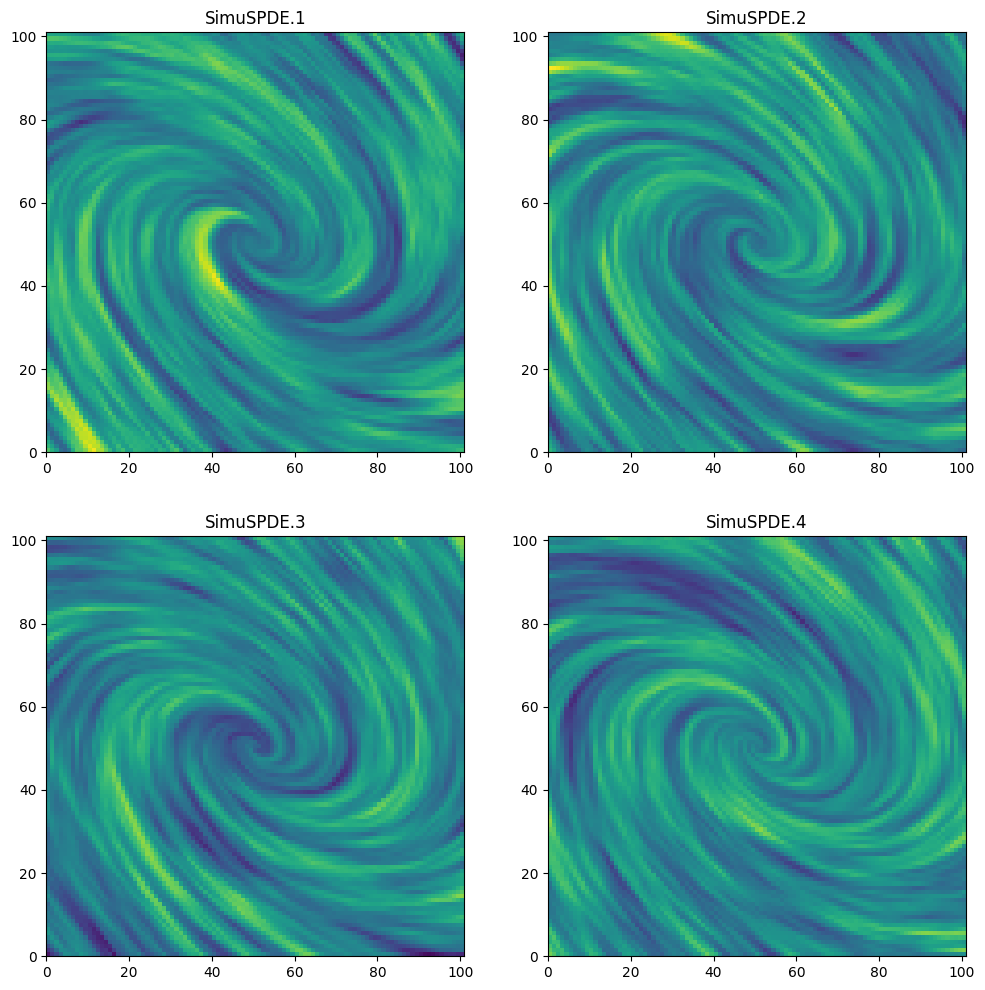

In [7]:
fig = plt.figure(figsize=(16,12))
vmin = -4
vmax = +4
ax1 = fig.add_subplot(2,2,1)
ax1.raster(grid,name="SimuSPDE.1", useSel=False, flagLegend = False, vmin=vmin, vmax=vmax)
ax2 = fig.add_subplot(2,2,2)
ax2.raster(grid,name="SimuSPDE.2", useSel=False, flagLegend = False, vmin=vmin, vmax=vmax)
ax3 = fig.add_subplot(2,2,3)
ax3.raster(grid,name="SimuSPDE.3", useSel=False, flagLegend = False, vmin=vmin, vmax=vmax)
ax4 = fig.add_subplot(2,2,4)
ax4.raster(grid,name="SimuSPDE.4", useSel=False, flagLegend = False, vmin=vmin, vmax=vmax)

fig.subplots_adjust(right=0.7)

Extracting a set of nodes randomly located in order to create a data file which will serve as conditioning. The data is extracted from the first non-conditional simulation.

In [ ]:
data = gl.Db.createSamplingDb(grid, number=100, names=["x1", "x2", "SimuSPDE.1"])
data.setName("SimuSPDE.1", "data")
data

In [ ]:
gp.plot(data, nameColor="data")

Use the previous data set (and the non-stationary Model) in order to perform an estimation

In [ ]:
iuid = gl.krigingSPDE(data,grid,model)
grid

Representing the Estimation obtained on the Grid

In [ ]:
gp.plot(grid, "KrigingSPDE.data.estim")

Performing several conditional simulation

In [ ]:
nbsimu = 4
iuid = gl.simulateSPDE(data,grid,model,nbsimu, namconv=gl.NamingConvention("CondSimu"))
grid

Representing the conditional simulations

In [ ]:
fig = plt.figure(figsize=(16,12))
vmin = -4
vmax = +4
ax1 = fig.add_subplot(2,2,1)
ax1.raster(grid,name="CondSimu.*.1", useSel=False, flagLegend = False, vmin=vmin, vmax=vmax)
ax2 = fig.add_subplot(2,2,2)
ax2.raster(grid,name="CondSimu.*.2", useSel=False, flagLegend = False, vmin=vmin, vmax=vmax)
ax3 = fig.add_subplot(2,2,3)
ax3.raster(grid,name="CondSimu.*.3", useSel=False, flagLegend = False, vmin=vmin, vmax=vmax)
ax4 = fig.add_subplot(2,2,4)
ax4.raster(grid,name="CondSimu.*.4", useSel=False, flagLegend = False, vmin=vmin, vmax=vmax)

fig.subplots_adjust(right=0.7)